# 機械学習の基礎ハンズオン

このノートブックでは、機械学習の基礎的な概念と実装方法を学習します。以下のトピックをカバーします：

1. 機械学習の概要
2. ニューラルネットワークの基本構造
3. パラメータ学習の仕組み
4. 分類問題と損失関数
5. 誤差逆伝播法（バックプロパゲーション）
6. 学習率と最適化手法
7. 実践：簡単なニューラルネットワークの実装

**このハンズオンの目標**：

- 機械学習の基本的な考え方を理解する
- ニューラルネットワークの仕組みを直感的に把握する
- Pythonを使って実際に簡単なモデルを構築・学習させる体験をする
- モデルの評価方法や可視化の重要性を学ぶ

**前提知識**：

基本的なPythonの知識があれば十分ですが、NumPyの基礎を知っているとより理解が深まります。数学的な概念は必要に応じて解説します。

それでは、機械学習の世界を一緒に探検していきましょう！

# 本セクションのポイント

- データから学ぶアルゴリズム

機械学習は、入力データとそれに対応するラベル（正解）をもとに、モデルが未知のデータを予測する関数を学習します。 

- 学習の種類

主に「教師あり学習」（ラベル付きデータで予測モデルを構築）、「教師なし学習」（クラスタリングや次元削減）、「強化学習」（報酬を最大化する行動を学習）の３つに分類されます。

- 性能評価と汎化

学習後は検証用データで評価し、過学習を防ぐために正則化やクロスバリデーションを活用します。

## 1. 機械学習の概要

機械学習とは、コンピュータがデータから学習し、パターンを見つけ出し、予測や意思決定を行う能力を獲得するための技術です。

### なぜ機械学習が重要なのか？

従来のプログラミングでは、特定の問題を解決するためのルールを人間がすべて設計する必要がありました。しかし、以下のような場合には従来のアプローチが難しくなります：

- ルールが複雑すぎる（例：画像から猫を識別するルール）
- ルールが常に変化する（例：スパムメールの特徴）
- 個々の状況に合わせたパーソナライズが必要な場合（例：レコメンデーション）

機械学習では、「答え」となるデータを与えることで、コンピュータ自身がパターンを学習し、新しいデータに対して予測を行えるようになります。

### 機械学習の種類

主な学習方法は以下の3つに分類されます：

- **教師あり学習**：ラベル付きデータから学習（分類、回帰など）
  - 例：メールのスパム判定、住宅価格予測、顔認識
  - 入力データと正解（教師データ）のペアからパターンを学習

- **教師なし学習**：ラベルなしデータからパターンを発見（クラスタリングなど）
  - 例：顧客セグメンテーション、異常検知、次元削減
  - 正解ラベルなしで、データ内の構造やグループを自動的に発見

- **強化学習**：環境との相互作用から学習（報酬の最大化）
  - 例：ゲームAI、ロボット制御、自動運転
  - 試行錯誤を通じて、報酬を最大化する行動方針を学習

  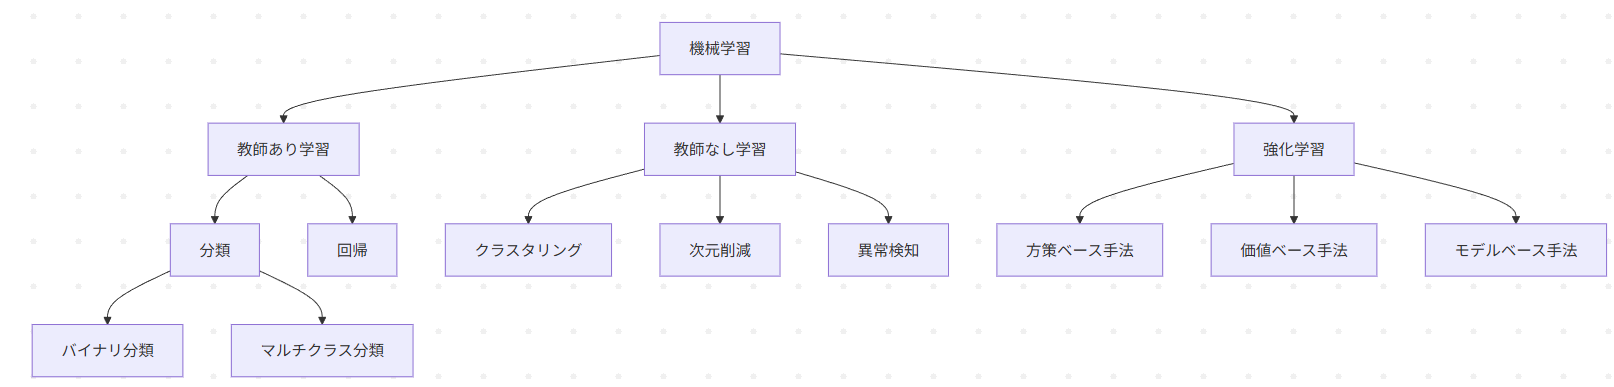

今回のハンズオンでは、主に教師あり学習の中でも最も基本的なニューラルネットワークに焦点を当てます。

## 2. 必要なライブラリのインポート

まずは、このハンズオンで使用するライブラリをインポートします。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# グラフを表示するための設定
%matplotlib inline

%pip install -U japanize-matplotlib

# 日本語化ライブラリのインポート＆有効化
import japanize_matplotlib
plt.rcParams['font.family'] = 'IPAGothic'
plt.rcParams['axes.unicode_minus'] = False
japanize_matplotlib.japanize()

import matplotlib.font_manager as fm

plt.style.use('ggplot')
sns.set(font_scale=1.2)

## 3. ニューラルネットワークの基本構造

ニューラルネットワークは、人間の脳の神経細胞（ニューロン）の仕組みを模倣したモデルです。実際の脳のように、情報は入力から出力へと「層」を通じて伝わっていきます。

### ニューラルネットワークの構成要素

1. **入力層（Input Layer）**：データの特徴を受け取る層
   - 各ニューロンは入力データの1つの特徴量（例：画像のピクセル値、年齢、身長など）に対応
   - ニューロン数 = 特徴量の数

2. **隠れ層（Hidden Layer）**：入力を変換・処理する中間層
   - 複数の層を持つことが可能（これが「深層」学習の「深さ」に相当）
   - 複雑なパターンを学習するために重要
   - ニューロン数はモデル設計者が決定（ハイパーパーパラメータ）

3. **出力層（Output Layer）**：予測・分類結果を出力する層
   - 回帰問題：通常1つのニューロン（予測値）
   - 分類問題：クラス数に応じたニューロン数（各クラスの確率）

4. **重み（Weight）**：層間の接続強度を表すパラメータ
   - ネットワークの「知識」を表現
   - 学習過程で自動的に調整される

5. **バイアス（Bias）**：ニューロンの活性化閾値を調整するパラメータ
   - 活性化関数の入力を調整する定数項
   - 重みと同様に学習される

6. **活性化関数（Activation Function）**：非線形性を導入する関数
   - シグモイド：0〜1の範囲の出力（古典的）
   - ReLU：max(0, x)（現代的で計算効率が良い）
   - tanh：-1〜1の範囲の出力

### 数学的な表現

一つのニューロンの出力は以下のように計算されます：

$$y = f(\sum_{i=1}^{n} w_i x_i + b)$$

ここで：
- $x_i$ は入力値
- $w_i$ は重み
- $b$ はバイアス
- $f()$ は活性化関数

以下で簡単なニューラルネットワークの構造を視覚化してみましょう。この図を見ることで、ニューロン間の接続や情報の流れについてイメージしやすくなるでしょう。

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import japanize_matplotlib
import sys
import matplotlib.font_manager as fm

# Check if running on Linux
if sys.platform.startswith('linux'):
    # List available fonts with Japanese support
    fonts = [f for f in fm.findSystemFonts() if 'gothic' in f.lower() or 'mincho' in f.lower() or 'meiryo' in f.lower()]
    
    if fonts:
        # Use the first available Japanese font
        plt.rcParams['font.family'] = fm.FontProperties(fname=fonts[0]).get_name()
    else:
        # Fallback to IPAGothic or another common Japanese font
        plt.rcParams['font.family'] = 'IPAGothic, Noto Sans CJK JP, MS Gothic'
else:
    # On Windows/Mac, use platform-specific fonts
    if sys.platform.startswith('win'):
        plt.rcParams['font.family'] = 'MS Gothic'
    elif sys.platform.startswith('darwin'):
        plt.rcParams['font.family'] = 'AppleGothic'

# Disable font warnings (optional)
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

plt.rcParams['axes.unicode_minus'] = False
japanize_matplotlib.japanize()  # Apply japanize_matplotlib settings

In [ ]:
def visualize_network_structure():
    """簡単なニューラルネットワークの構造を視覚化する関数"""
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # 各層のニューロン数
    n_input = 3
    n_hidden = 4
    n_output = 2
    
    # 各層の位置
    layer_positions = [0.2, 0.5, 0.8]  # x座標
    
    # 入力層
    input_neurons = []
    for i in range(n_input):
        y = (i + 1) / (n_input + 1)
        circle = plt.Circle((layer_positions[0], y), 0.05, fill=True, color='lightblue')
        ax.add_patch(circle)
        ax.text(layer_positions[0] - 0.15, y, f'x{i+1}', fontsize=12)
        input_neurons.append((layer_positions[0], y))
    
    # 隠れ層
    hidden_neurons = []
    for i in range(n_hidden):
        y = (i + 1) / (n_hidden + 1)
        circle = plt.Circle((layer_positions[1], y), 0.05, fill=True, color='lightgreen')
        ax.add_patch(circle)
        hidden_neurons.append((layer_positions[1], y))
    
    # 出力層
    output_neurons = []
    for i in range(n_output):
        y = (i + 1) / (n_output + 1)
        circle = plt.Circle((layer_positions[2], y), 0.05, fill=True, color='salmon')
        ax.add_patch(circle)
        ax.text(layer_positions[2] + 0.1, y, f'y{i+1}', fontsize=12)
        output_neurons.append((layer_positions[2], y))
    
    # 接続（エッジ）を描画
    # 入力層→隠れ層
    for i_pos in input_neurons:
        for h_pos in hidden_neurons:
            ax.plot([i_pos[0], h_pos[0]], [i_pos[1], h_pos[1]], 'k-', alpha=0.3)
    
    # 隠れ層→出力層
    for h_pos in hidden_neurons:
        for o_pos in output_neurons:
            ax.plot([h_pos[0], o_pos[0]], [h_pos[1], o_pos[1]], 'k-', alpha=0.3)
    
    # レイヤーラベル
    ax.text(layer_positions[0], 0.05, '入力層', ha='center', fontsize=14)
    ax.text(layer_positions[1], 0.05, '隠れ層', ha='center', fontsize=14)
    ax.text(layer_positions[2], 0.05, '出力層', ha='center', fontsize=14)
    
    # 数式の例
    ax.text(0.5, 0.95, r'隠れ層: $h_j = f(\sum_{i} w_{ij}x_i + b_j)$', ha='center', fontsize=12)
    ax.text(0.5, 0.9, r'出力層: $y_k = g(\sum_{j} w_{jk}h_j + b_k)$', ha='center', fontsize=12)
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# ニューラルネットワークの図を表示
visualize_network_structure()

### 活性化関数

活性化関数はニューラルネットワークに非線形性を導入する重要な要素です。これがなければ、どれだけ層を重ねても単なる線形変換にしかならず、複雑なパターンを学習できません。

#### なぜ活性化関数が必要なのか？

活性化関数がない場合、ネットワークは以下のようになります：

$$y = W_2(W_1x + b_1) + b_2 = (W_2W_1)x + (W_2b_1 + b_2)$$

これは単なる線形関数であり、複数の層を重ねる意味がありません。活性化関数を導入することで、ネットワークは複雑な非線形関係を学習できるようになります。

#### 代表的な活性化関数とその特徴

1. **シグモイド関数 (Sigmoid)**:
   - 出力範囲：0〜1
   - 特徴：古典的によく使われたが、勾配消失問題がある
   - 用途：二値分類の出力層などに使用

2. **双曲線正接関数 (tanh)**:
   - 出力範囲：-1〜1
   - 特徴：シグモイドと同様の形状だが、原点中心
   - 用途：隠れ層に使用されることがある

3. **ReLU (Rectified Linear Unit)**:
   - 定義：$f(x) = max(0, x)$
   - 特徴：計算が単純、勾配消失問題が少ない
   - 問題点：「死んだReLU」問題（学習中にニューロンが活性化しなくなる）
   - 用途：現代のニューラルネットワークの隠れ層で最も一般的

4. **Leaky ReLU**:
   - 定義：$f(x) = max(\alpha x, x)$ （$\alpha$は小さな正の値、例えば0.01）
   - 特徴：ReLUの改良版で「死んだReLU」問題を軽減

以下では、これらの活性化関数の形状をグラフで確認し、その特性を視覚的に理解します。

In [ ]:
def plot_activation_functions():
    """代表的な活性化関数をプロットする関数"""
    x = np.linspace(-5, 5, 100)
    
    # 各活性化関数の定義
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    def tanh(x):
        return np.tanh(x)
    
    def relu(x):
        return np.maximum(0, x)
    
    def leaky_relu(x, alpha=0.1):
        return np.maximum(alpha * x, x)
    
    # グラフ描画
    fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    axs = axs.flatten()
    
    # Sigmoid
    axs[0].plot(x, sigmoid(x), 'b-', linewidth=2)
    axs[0].set_title('シグモイド関数 (Sigmoid)')
    axs[0].set_xlabel('入力')
    axs[0].set_ylabel('出力')
    axs[0].grid(True)
    axs[0].text(1, 0.2, r'$f(x) = \frac{1}{1 + e^{-x}}$', fontsize=12)
    
    # tanh
    axs[1].plot(x, tanh(x), 'g-', linewidth=2)
    axs[1].set_title('双曲線正接関数 (tanh)')
    axs[1].set_xlabel('入力')
    axs[1].set_ylabel('出力')
    axs[1].grid(True)
    axs[1].text(1, 0.2, r'$f(x) = \tanh(x)$', fontsize=12)
    
    # ReLU
    axs[2].plot(x, relu(x), 'r-', linewidth=2)
    axs[2].set_title('正規化線形関数 (ReLU)')
    axs[2].set_xlabel('入力')
    axs[2].set_ylabel('出力')
    axs[2].grid(True)
    axs[2].text(1, 2, r'$f(x) = \max(0, x)$', fontsize=12)
    
    # Leaky ReLU
    axs[3].plot(x, leaky_relu(x), 'm-', linewidth=2)
    axs[3].set_title('リーキー正規化線形関数 (Leaky ReLU)')
    axs[3].set_xlabel('入力')
    axs[3].set_ylabel('出力')
    axs[3].grid(True)
    axs[3].text(1, 2, r'$f(x) = \max(\alpha x, x), \alpha=0.1$', fontsize=12)
    
    plt.tight_layout()
    plt.show()

# 活性化関数のグラフを表示
plot_activation_functions()

## 4. パラメータ学習の仕組み

ニューラルネットワークの学習過程は以下のステップで行われます：

1. **順伝播（Forward Propagation）**：入力データがネットワークを通過し、予測値を生成
2. **損失計算**：予測値と実際の値（正解ラベル）との誤差を計算
3. **逆伝播（Back Propagation）**：誤差を用いて各パラメータの勾配を計算
4. **パラメータ更新**：勾配を使って重みとバイアスを更新（最適化アルゴリズム）

### 重要な概念：エポック（Epoch）

**エポック**とは、機械学習において全ての訓練データが一度ネットワークを通過することを指します。つまり、1エポックとは訓練データセット全体を1回学習することです。例えば、1000件のデータがあるとき、1000件全てを使って学習を1回行うと「1エポック完了」となります。

多くの場合、ニューラルネットワークはデータを何度も繰り返し学習することで精度を向上させます。10エポック、100エポック、1000エポックといった具合に複数回の学習を行います。エポック数はハイパーパラメータの一つで、少なすぎると「過少学習」（モデルが十分に学習できない）、多すぎると「過学習」（訓練データに特化しすぎて汎化性能が下がる）の原因になることがあります。

このエポックという概念は後述する学習曲線（損失や精度のグラフ）を理解する上で重要です。

以下では、簡単な例を通して学習アルゴリズムを実装していきます。

### データセットの準備

まずは簡単な分類問題のためのデータセットを用意します。scikit-learnのIrisデータセットを使用して、花の種類を分類するモデルを構築します。

In [ ]:
# Irisデータセットの読み込み
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 簡単のため、2種類の花だけを使用
X = X[y < 2]
y = y[y < 2]

# データの標準化
scaler = StandardScaler()
X = scaler.fit_transform(X)

# トレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"データの形状: {X.shape}")
print(f"クラスの分布: {np.bincount(y)}")

# データを可視化する
plt.figure(figsize=(10, 6))
for i, feature_idx in enumerate([(0, 1), (2, 3)]):
    plt.subplot(1, 2, i+1)
    for label in range(2):
        plt.scatter(X[y == label, feature_idx[0]], X[y == label, feature_idx[1]], 
                   label=f'Class {label}')
    plt.xlabel(f'Feature {feature_idx[0]}')
    plt.ylabel(f'Feature {feature_idx[1]}')
    plt.legend()
    plt.title(f'Iris Features {feature_idx[0]} vs {feature_idx[1]}')
plt.tight_layout()
plt.show()

## 5. シンプルなニューラルネットワークの実装

ここでは、入力層（4特徴）、隠れ層（5ユニット）、出力層（1ユニット）から成る簡単なニューラルネットワークを実装します。

### コードの解説

これから実装するニューラルネットワークの各パートについて説明します：

1. **初期化（`__init__`メソッド）**：
   - ネットワークの重みとバイアスを初期化します
   - Xavier初期化を使用して重みを設定（学習の安定化に重要）
   - 損失と精度の履歴を記録するためのリストを準備

2. **活性化関数と導関数**：
   - シグモイド関数：出力を0〜1の範囲に変換
   - シグモイド導関数：逆伝播時に勾配計算に使用

3. **順伝播（`forward`メソッド）**：
   - 入力から隠れ層への変換: $z_1 = XW_1 + b_1$
   - 隠れ層の活性化: $a_1 = \sigma(z_1)$
   - 隠れ層から出力層への変換: $z_2 = a_1W_2 + b_2$
   - 出力層の活性化: $a_2 = \sigma(z_2)$

4. **損失計算（`compute_loss`メソッド）**：
   - 二値交差エントロピー損失：$L = -\frac{1}{m}\sum_{i=1}^{m}[y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)]$
   - 予測値と実際の値の差を数値化する指標

5. **逆伝播（`backward`メソッド）**：
   - 出力層の誤差を計算: $dz_2 = a_2 - y$
   - 出力層の重みとバイアスの勾配を計算
   - 隠れ層の誤差を計算: $dz_1 = dz_2W_2^T \odot \sigma'(a_1)$
   - 隠れ層の重みとバイアスの勾配を計算
   - 勾配を使って重みとバイアスを更新

6. **予測と評価（`predict`と`accuracy`メソッド）**：
   - 予測：出力が0.5以上なら1、そうでなければ0
   - 精度：正確に分類されたサンプルの割合

7. **学習プロセス（`fit`メソッド）**：
   - 指定されたエポック数だけ学習を繰り返す
   - 各エポックで損失と精度を計算して記録
   - 学習の進行状況を定期的に表示

以下でこのネットワークを実装していきます。コード内のコメントも参照してください。

In [ ]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        """ニューラルネットワークの初期化
        
        Parameters:
        -----------
        input_size : int
            入力層のニューロン数（特徴量の数）
        hidden_size : int
            隠れ層のニューロン数
        output_size : int
            出力層のニューロン数（二値分類の場合は1）
        
        Notes:
        ------
        Xavier初期化を使って重みを初期化しています。これは学習の収束を早めるために重要です。
        """
        # Xavier初期化で重みを初期化 - 初期値が重要！
        self.W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1 / input_size)
        self.b1 = np.zeros(hidden_size)
        self.W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1 / hidden_size)
        self.b2 = np.zeros(output_size)
        
        # 学習履歴の保存用
        self.loss_history = []
        self.accuracy_history = []
    
    def sigmoid(self, x):
        """シグモイド活性化関数
        入力値を0〜1の範囲に変換します
        
        入力値が大きすぎる場合にオーバーフローを防ぐため、クリッピングを行っています。
        """
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # オーバーフローを防止
    
    def sigmoid_derivative(self, x):
        """シグモイド関数の導関数
        逆伝播時の勾配計算に使用します
        
        注意：入力xはすでにシグモイド関数を通過した値を想定しています
        """
        return x * (1 - x)
    
    def forward(self, X):
        """順伝播（フォワードプロパゲーション）
        入力データがネットワークを通過して出力を生成するプロセスです
        """
        # 隠れ層の計算: z1 = X・W1 + b1
        self.z1 = np.dot(X, self.W1) + self.b1  # 線形変換
        self.a1 = self.sigmoid(self.z1)  # 活性化（非線形変換）
        
        # 出力層の計算: z2 = a1・W2 + b2
        self.z2 = np.dot(self.a1, self.W2) + self.b2  # 線形変換
        self.a2 = self.sigmoid(self.z2)  # 活性化（非線形変換）
        
        return self.a2  # 最終出力（0〜1の確率値）
    
    def compute_loss(self, y_true, y_pred):
        """二値交差エントロピー損失関数
        予測値と実際の値の誤差を計算します
        二値分類問題で広く使われる損失関数です
        """
        # 数値安定性のためのクリッピング（0や1に完全に近いと計算が不安定になるため）
        y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
        # 二値交差エントロピー: -(y*log(p) + (1-y)*log(1-p))
        return - np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def backward(self, X, y, learning_rate=0.01):
        """逆伝播（バックプロパゲーション）と重みの更新
        損失関数の勾配を計算し、重みを更新します
        """
        m = X.shape[0]  # サンプル数（バッチサイズ）
        
        # 出力層の誤差: dz2 = a2 - y (二値交差エントロピーと活性化関数がシグモイドの場合の簡略化式)
        dz2 = self.a2 - y.reshape(-1, 1)  # 予測値と実際の値の差
        dW2 = np.dot(self.a1.T, dz2) / m  # 出力層の重みに関する勾配
        db2 = np.sum(dz2, axis=0) / m  # 出力層のバイアスに関する勾配
        
        # 隠れ層の誤差: dz1 = dz2・W2^T * sigmoid_derivative(a1)
        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(self.a1)  # 誤差の逆伝播
        dW1 = np.dot(X.T, dz1) / m  # 隠れ層の重みに関する勾配
        db1 = np.sum(dz1, axis=0) / m  # 隠れ層のバイアスに関する勾配
        
        # 勾配降下法による重みとバイアスの更新: θ = θ - α・∇θ
        self.W2 -= learning_rate * dW2  # 出力層の重みを更新
        self.b2 -= learning_rate * db2  # 出力層のバイアスを更新
        self.W1 -= learning_rate * dW1  # 隠れ層の重みを更新
        self.b1 -= learning_rate * db1  # 隠れ層のバイアスを更新
    
    def predict(self, X):
        """予測を行う関数
        確率値が0.5以上なら1、そうでなければ0と判定します（二値分類）
        """
        return (self.forward(X) >= 0.5).astype(int)  # 0.5を閾値として0か1かを判定
    
    def accuracy(self, X, y):
        """モデルの精度を計算する関数
        正確に分類できたサンプルの割合を返します
        """
        predictions = self.predict(X)
        return np.mean(predictions.flatten() == y)  # 予測が正解と一致する割合
    
    def fit(self, X, y, epochs=1000, learning_rate=0.01, verbose=True):
        """モデルの学習を行う関数
        
        Parameters:
        -----------
        X : numpy.ndarray
            訓練データの特徴量
        y : numpy.ndarray
            訓練データの正解ラベル
        epochs : int
            学習を繰り返す回数
        learning_rate : float
            学習率（パラメータ更新の大きさを制御）
        verbose : bool
            学習の途中経過を表示するかどうか
        """
        for epoch in range(epochs):
            # 順伝播: 予測値を計算
            y_pred = self.forward(X)
            
            # 損失と精度を計算
            loss = self.compute_loss(y, y_pred)
            acc = self.accuracy(X, y)
            
            # 学習履歴を保存
            self.loss_history.append(loss)
            self.accuracy_history.append(acc)
            
            # 逆伝播と重みの更新
            self.backward(X, y, learning_rate)
            
            # 途中経過の表示（100エポックごと、または最後のエポックで表示）
            if verbose and (epoch % 100 == 0 or epoch == epochs-1):
                print(f"Epoch {epoch}/{epochs}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")

# モデルの設定パラメータを準備
input_size = X_train.shape[1]  # 入力層のサイズ（特徴量の数 = 4）
hidden_size = 5  # 隠れ層のサイズ（ハイパーパラメータとして調整可能）
output_size = 1  # 出力層のサイズ（バイナリ分類なので1）

# ニューラルネットワークのインスタンスを作成
print(f"ネットワーク構成: 入力層({input_size}) → 隠れ層({hidden_size}) → 出力層({output_size})")
nn = SimpleNeuralNetwork(input_size, hidden_size, output_size)

# モデルの学習を開始（学習率は0.1、1000エポック）
print("学習を開始します...")
nn.fit(X_train, y_train, epochs=1000, learning_rate=0.1, verbose=True)

## 6. モデルの評価と可視化

学習したモデルをテストデータで評価し、学習過程を可視化します。

### 学習曲線について

**学習曲線（Learning Curve）** は、モデルの学習過程を視覚化したグラフです。横軸はエポック数（学習の繰り返し回数）、縦軸は損失（Loss）や精度（Accuracy）などの評価指標を表します。

- **損失曲線**: 理想的には、エポックが進むにつれて徐々に減少し、最終的に低い値で安定します。急激な減少や不安定な動きは、学習率が高すぎることを示唆する場合があります。

- **精度曲線**: エポックが進むにつれて増加し、高い値で安定するのが理想的です。

これらのグラフを観察することで、以下のような問題を診断できます：
- **過学習（Overfitting）**: 訓練データの精度は高いがテストデータの精度が低い場合
- **過少学習（Underfitting）**: 訓練データもテストデータも精度が低い場合
- **最適な学習回数**: 精度が最大に達するエポック数

In [ ]:
# テストデータでの精度評価
test_accuracy = nn.accuracy(X_test, y_test)
print(f"テストデータでの精度: {test_accuracy:.4f}")

# 学習過程の可視化
plt.figure(figsize=(12, 5))

# 損失のグラフ
plt.subplot(1, 2, 1)
plt.plot(nn.loss_history, 'b-')
plt.xlabel('エポック')
plt.ylabel('損失')
plt.title('学習曲線（損失）')
plt.grid(True)

# 精度のグラフ
plt.subplot(1, 2, 2)
plt.plot(nn.accuracy_history, 'r-')
plt.xlabel('エポック')
plt.ylabel('精度')
plt.title('学習曲線（精度）')
plt.grid(True)

plt.tight_layout()
plt.show()

## 7. 決定境界の可視化

### 決定境界とは何か

**決定境界（Decision Boundary）** とは、異なるクラスを分類する境界線や境界面のことです。分類問題において、モデルはデータ空間を複数の領域に分割し、それぞれの領域に特定のクラスラベルを割り当てます。その領域間の境界が決定境界です。

2クラス分類の場合、決定境界は以下のように定義できます：
- 入力されたデータがクラス0とクラス1のどちらに属するかを判断する境界線
- 数学的には、モデルの出力確率が0.5となる点の集合（二値分類の場合）

決定境界の形状はモデルの複雑さによって異なります：
- **線形モデル**：直線や平面の決定境界
- **非線形モデル**（ニューラルネットワークなど）：曲線や複雑な形状の決定境界

決定境界の可視化は、モデルの挙動を理解するための重要なツールであり、特に以下の点で役立ちます：
- モデルがどのようにデータを分類しているかの直感的な理解
- モデルの複雑さが適切かどうかの評価（単純すぎる/複雑すぎる）
- 誤分類されるデータポイントのパターンの特定

以下では、2次元の特徴量を選択して、学習したモデルの決定境界を可視化します。

In [ ]:
def plot_decision_boundary(model, X, y, features=(0, 1)):
    """決定境界を可視化する関数"""
    # 特徴量を選択
    X_subset = X[:, features]
    
    # メッシュグリッドを作成
    h = 0.02  # グリッドの粒度
    x_min, x_max = X_subset[:, 0].min() - 1, X_subset[:, 0].max() + 1
    y_min, y_max = X_subset[:, 1].min() - 1, X_subset[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # グリッドポイントの予測
    # まず、全特徴量を含むデータフレームを作成
    grid = np.ones((xx.ravel().shape[0], X.shape[1])) * np.mean(X, axis=0)
    grid[:, features[0]] = xx.ravel()
    grid[:, features[1]] = yy.ravel()
    
    # 予測
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)
    
    # 決定境界をプロット
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel(f'特徴量 {features[0]}')
    plt.ylabel(f'特徴量 {features[1]}')
    plt.title('決定境界と訓練データ')
    plt.colorbar()
    plt.tight_layout()
    plt.show()

# 決定境界の可視化（特徴量の組み合わせを2つ試してみる）
print("特徴量0と1を使った決定境界の可視化：")
print("この図は、モデルが特徴量0と1の値に基づいてどのように分類決定を下すかを示しています。")
print("色の濃い領域がクラス1、薄い領域がクラス0と予測される領域です。点は実際のデータポイントです。")
plot_decision_boundary(nn, X, y, features=(0, 1))

print("特徴量2と3を使った決定境界の可視化：")
print("この図からは、モデルが別の特徴量の組み合わせでどのように分類するかがわかります。")
print("決定境界の形状の複雑さから、モデルの表現力を確認できます。")
plot_decision_boundary(nn, X, y, features=(2, 3))

### 決定境界の解釈

上記の図を見ると、モデルがどのように特徴空間を分割しているかがわかります。以下の点に注目してみましょう：

1. **境界の形状**：
   - 直線的な境界は単純なモデルを示す
   - 曲線的な境界は複雑なモデルを示す
   - 本例では、簡単なニューラルネットワークでも非線形の決定境界を学習できています

2. **誤分類されたデータポイント**：
   - 決定境界の「間違った側」にあるデータポイントは誤分類されています
   - これらのポイントを観察することで、モデルが苦手とするパターンを把握できます

3. **分類の確信度**：
   - 決定境界から離れたデータポイントほど、分類の確信度が高いと考えられます
   - 境界付近のデータは分類が不確かで、小さな特徴変化で分類結果が変わる可能性があります

4. **特徴量の重要度**：
   - 異なる特徴量の組み合わせで決定境界の形状が大きく異なる場合、特徴量の重要度に差があることを示唆します
   - よりきれいに分離できる特徴量の組み合わせは、分類により有用である可能性が高いです

決定境界の可視化は、モデルの内部動作を「ブラックボックス」から「理解可能なもの」へと変える強力なツールです。実際の応用では、このような可視化によってモデルの弱点を特定し、改善することができます。

## 8. 学習率の影響

### 学習率とは

**学習率（Learning Rate）** は、勾配降下法においてパラメータを更新する際の「ステップサイズ」を制御するハイパーパラメータです。簡単に言えば、各反復でモデルパラメータをどれだけ調整するかを決める「速度調整つまみ」のようなものです。

数学的には、パラメータの更新式は以下のようになります：

$$\theta_{\text{new}} = \theta_{\text{old}} - \eta \nabla J(\theta)$$

ここで、$\eta$（イータ）が学習率、$\nabla J(\theta)$が損失関数の勾配です。

学習率の選択は非常に重要で、以下のような影響があります：

- **学習率が大きすぎる場合**：
  - 最適値を「飛び越えてしまう」可能性がある
  - 収束せずに発散する可能性がある
  - 学習が不安定になる（損失のグラフが振動する）

- **学習率が小さすぎる場合**：
  - 学習が非常に遅くなる
  - 局所的最適解に留まる可能性が高くなる
  - 収束に必要なエポック数が大幅に増加する

最適な学習率は問題やデータセットによって異なるため、しばしば実験的に決定されます。また、学習過程で学習率を動的に調整する手法（学習率スケジューリング）も広く使われています。

以下では、異なる学習率を用いた場合の学習過程の違いを見ていきます。

In [ ]:
def compare_learning_rates(X_train, y_train, learning_rates=[0.001, 0.01, 0.1, 1.0], epochs=1000):
    """異なる学習率での学習過程を比較する関数"""
    plt.figure(figsize=(15, 10))
    
    # 学習率ごとに異なる色を使用
    colors = ['blue', 'green', 'red', 'purple']
    
    for i, lr in enumerate(learning_rates):
        # モデルの作成と学習
        print(f"学習率 {lr} でモデルを学習中...")
        model = SimpleNeuralNetwork(input_size, hidden_size, output_size)
        model.fit(X_train, y_train, epochs=epochs, learning_rate=lr, verbose=False)
        
        # テストデータでの精度を評価
        test_acc = model.accuracy(X_test, y_test)
        print(f"学習率 {lr} のテスト精度: {test_acc:.4f}")
        
        # 損失のグラフ (全体)
        plt.subplot(2, 2, 1)
        plt.plot(model.loss_history, label=f'lr={lr}', color=colors[i])
        plt.xlabel('エポック')
        plt.ylabel('損失')
        plt.title('学習率による損失の変化（全エポック）')
        plt.legend()
        plt.grid(True)
        
        # 精度のグラフ (全体)
        plt.subplot(2, 2, 2)
        plt.plot(model.accuracy_history, label=f'lr={lr}', color=colors[i])
        plt.xlabel('エポック')
        plt.ylabel('精度')
        plt.title('学習率による精度の変化（全エポック）')
        plt.legend()
        plt.grid(True)
        
        # 初期の損失のグラフ（最初の100エポック）
        plt.subplot(2, 2, 3)
        plt.plot(model.loss_history[:100], label=f'lr={lr}', color=colors[i])
        plt.xlabel('エポック')
        plt.ylabel('損失')
        plt.title('学習率による初期の損失変化（最初の100エポック）')
        plt.legend()
        plt.grid(True)
        
        # 初期の精度のグラフ（最初の100エポック）
        plt.subplot(2, 2, 4)
        plt.plot(model.accuracy_history[:100], label=f'lr={lr}', color=colors[i])
        plt.xlabel('エポック')
        plt.ylabel('精度')
        plt.title('学習率による初期の精度変化（最初の100エポック）')
        plt.legend()
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# 異なる学習率での学習過程を比較
print("異なる学習率がニューラルネットワークの学習にどのような影響を与えるか観察します。")
print("学習率が大きいと素早く学習するが不安定になることがあり、小さいと安定するが学習が遅くなります。")
compare_learning_rates(X_train, y_train, learning_rates=[0.001, 0.01, 0.1, 1.0], epochs=1000)

### 学習率の違いによる影響の考察

上記のグラフから、学習率がモデルの学習に大きく影響することがわかります：

1. **小さすぎる学習率（0.001）** の場合：
   - 損失の減少が非常に緩やか（青線）
   - 収束に多くのエポックが必要
   - 学習が遅く、1000エポックでも最適解に到達していない可能性がある

2. **適切な学習率（0.01〜0.1）** の場合：
   - 損失が順調に減少し、適切な速さで収束する（緑・赤線）
   - 精度も安定して上昇する
   - 適度なスピードで最適解に近づいていく

3. **大きすぎる学習率（1.0）** の場合：
   - 初期段階で急速に学習する可能性がある（紫線）
   - しかし、損失や精度のグラフが振動し、不安定になる可能性がある
   - 最適解を「飛び越えて」収束しない場合もある

#### 実際のプロジェクトでの学習率の選び方

1. **グリッドサーチ（Grid Search）**：
   - 複数の学習率（例：0.0001, 0.001, 0.01, 0.1）を試して最良のものを選ぶ

2. **学習率スケジューリング**：
   - 学習の初期段階では大きい学習率（素早く大まかな最適解の領域に到達）
   - 後半では小さい学習率（細かく最適解を調整）に減衰させる

3. **適応的学習率**：
   - Adam, RMSprop などの最適化アルゴリズムは、パラメータごとに学習率を自動調整する
   - 実務では、これらの高度な最適化手法がよく使われる

最適な学習率は問題やデータセットごとに異なるため、実験的に探索することが重要です。

## 9. まとめと応用

このハンズオンでは、機械学習の基礎について学びました：

1. **ニューラルネットワークの基本構造**：入力層、隠れ層、出力層からなる構造
2. **活性化関数**：シグモイド、tanh、ReLU、Leaky ReLUなどの非線形変換
3. **パラメータ学習**：順伝播と逆伝播による重みの更新
4. **損失関数**：予測と実際の値の誤差を測定する関数
5. **勾配降下法**：損失関数の勾配を使ったパラメータの最適化
6. **学習率**：パラメータ更新の幅を制御するハイパーパラメータ

### 次のステップとして学ぶべきこと

1. **深層ニューラルネットワーク**：より多くの隠れ層を持つモデル
2. **正則化テクニック**：過学習を防ぐためのテクニック（ドロップアウト、L1/L2正則化など）
3. **高度な最適化アルゴリズム**：Adam, RMSprop, Momentum SGDなど
4. **畳み込みニューラルネットワーク（CNN）**：画像処理に特化したアーキテクチャ
5. **再帰型ニューラルネットワーク（RNN）**：系列データ処理に特化したアーキテクチャ

以上のトピックを深く理解することで、より高度な機械学習モデルを構築する基盤が築かれます。

## 10. 学習リソースと実践的なヒント

### 機械学習をさらに学ぶためのリソース

このハンズオンで学んだ基礎知識をさらに深めるために、以下のリソースがおすすめです：

#### オンラインコース

1. **[Coursera - Machine Learning by Andrew Ng](https://www.coursera.org/learn/machine-learning)**
   - 機械学習の基礎から応用までを網羅した定番コース

2. **[fast.ai](https://www.fast.ai/)**
   - 実践的なアプローチで深層学習を学べるコース

3. **[Deep Learning Specialization](https://www.coursera.org/specializations/deep-learning)**
   - ニューラルネットワークの理論と実装を深く学べる

#### 書籍

1. **『ゼロから作るDeep Learning』**（斎藤康毅著）
   - Pythonで一からニューラルネットワークを実装する過程を通して学べる

2. **『はじめてのパターン認識』**（平井有三著）
   - パターン認識と機械学習の基礎を丁寧に解説

3. **『Deep Learning』**（Ian Goodfellow, Yoshua Bengio, Aaron Courville著）
   - 深層学習の理論を詳細に学びたい方向け

#### 実践的なコードリポジトリ

1. **[scikit-learn Examples](https://scikit-learn.org/stable/auto_examples/index.html)**
   - 様々な機械学習アルゴリズムの使用例

2. **[TensorFlow Tutorials](https://www.tensorflow.org/tutorials)**
   - TensorFlowを使った深層学習モデルの構築方法

3. **[PyTorch Tutorials](https://pytorch.org/tutorials/)**
   - PyTorchの基礎から応用までのチュートリアル

### 実践的なヒント

1. **小さなプロジェクトから始める**
   - 大きなプロジェクトよりも、小さな問題を解くことから始めると理解が深まります
   - Kaggleの初心者向けコンペティション（Titanic, House Pricesなど）に挑戦してみましょう

2. **データの前処理と可視化に時間をかける**
   - 機械学習プロジェクトの成功の8割はデータの前処理と理解にかかっています
   - データを様々な角度から可視化し、パターンを見つけることが重要です

3. **シンプルなモデルから始める**
   - 複雑なモデルよりも、まずはシンプルなモデル（線形回帰、決定木など）から始めましょう
   - ベースラインとなるシンプルなモデルの性能を理解してから、徐々に複雑なモデルに挑戦するのが良いです

4. **継続的に学習する姿勢を持つ**
   - 機械学習は日々進化している分野です
   - 最新の論文や技術に触れる機会を持ち、継続的に学び続けることが大切です

5. **コミュニティに参加する**
   - Kaggle, GitHub, Stack Overflow, Reddit（r/MachineLearning）などのコミュニティに参加する
   - 他の学習者や専門家と交流することで、多くの学びを得ることができます

### おわりに

このハンズオンを通して、機械学習の基礎とニューラルネットワークの仕組みについて学びました。これはあくまで始まりに過ぎません。機械学習の世界は広大で、学ぶべきことが多くありますが、このハンズオンが皆さんの機械学習の旅の一助となれば幸いです。

次のノートブック「02_deep_neural_networks_tutorial.ipynb」では、より深いニューラルネットワークについて学んでいきます。引き続き学習を楽しんでください！